# Customer Segmentation with Clustering
**Project Overview**

This project explores **customer segmentation** using clustering techniques on a retail customer dataset. 
The goal is to identify distinct groups of customers based on their demographics, purchase and spending behavior, and interactions with the company. 

Insights from such analyses can help businesses with:  
- Developing **targeted marketing campaigns**  
- Improve their **customer retention strategies**  
- Personalize offers and communication  

**The Dataset**

The dataset is retrieved from [Kaggle] (https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering) and consists of **29 features** related to approximately **2200 customer profiles**, including demographics (age, education, marital status, income), purchasing behavior across different categories, and engagement channels (web, store, catalog). 

**Methods and Techniques**
- **Exploratory Data Analysis (EDA)** to understand distributions and correlations  
- **Data preprocessing** (handling missing values, scaling, encoding)  
- **Clustering with K-Means** to group customers  
- **Dimensionality reduction (PCA)** for visualization



In [93]:

# =================================
# Imports & Setup
# ================================

# Core libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings  
warnings.filterwarnings("ignore")   # Avoid warnings

In [3]:
# ============================
# Aesthetics and plot-styles
# ============================
sns.set_theme(
    style="whitegrid",
    palette="tab20",
    rc={"grid.color": ".7", "grid.linestyle": ":"}
)
plt.rcParams.update({
    "axes.titlesize": 15,
    "axes.titleweight": "black",
    "axes.labelsize": 10,
    "axes.labelweight": "bold",
    
})

## Data Loading & Understanding
Before we can start to work with the data, we have to **understand** the data. In this section, we'll look at:
- The structure of the dataset
- Missing values 
- Basic Descriptive Statistics

In [4]:
# Load the dataset as df
df = pd.read_csv("customer_segmentation.csv")

# Dataset Size
print("Dataset Shape:", df.shape)

Dataset Shape: (2240, 29)


### Dataset Overview

In [5]:
# Inspect first rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Get overview of all the columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

The dataset contains 2240 customers and 29 various features. Each customer is connected to a unique identifier, with a wide range of different features related to demographics, purchasing behavior, and engagement indicators. 

In [7]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Most features are complete. However, the variable `Income` has some missing values, which we will need to handle later.
- The `Dt_Customer` is a date-variable, but is stored as a text object. This needs to be converted to datetime.

In [8]:
# Missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We can confirm that only the `Income` has missing value. It is a small amount of 24, but we should handle this. Options include imputing with mean/median or simply by removing these 24 rows. 

### Descriptive Statistics
We'll review the descriptiv statistics to see if there could be any outliers in the data or other anomalies.

In [9]:
# Basic Statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Key Observations**
- `Year_Birth` includes unrealistic values, e.g. 1893 is the lowest value indicating that the customer is 121 y/o by 2014.
- `Income` has a max value of 666 666, which could be an error/outlier.
- Campaign acceptance rates are very low overall, which I guess could make sense when looking at the `Response`-feature.

## Exploratory Data Analysis
### Demographics
Let's start by exploring the customer demographics such as `Age`, `Income`, `Education`and `Maritial Status`. We don't have a feature representing the age of the customers, so we need to create a `Age`variable by extracting the birth year from 2014 (since the data is up until this year).

In [10]:
# Create Age variable
df["Age"] = 2014 - df["Year_Birth"]

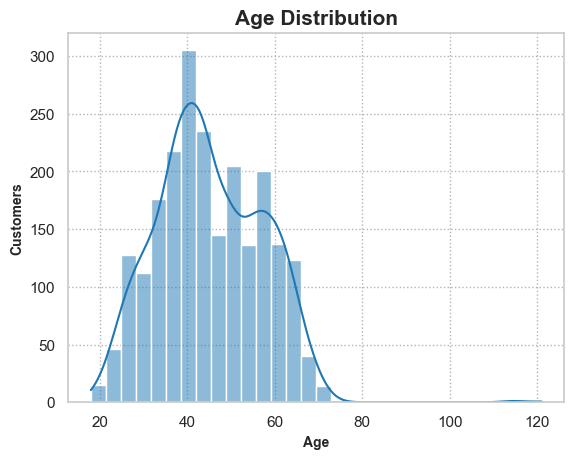

In [11]:
# Plot Age distribution
sns.histplot(df["Age"], bins = 30, kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Customers")
plt.show()

The majority of the customers are between ~30 and 70 y/o. We can also see the extreme values around 120 which we saw in the descriptive statistics, which we'll treat as outlier later on. 


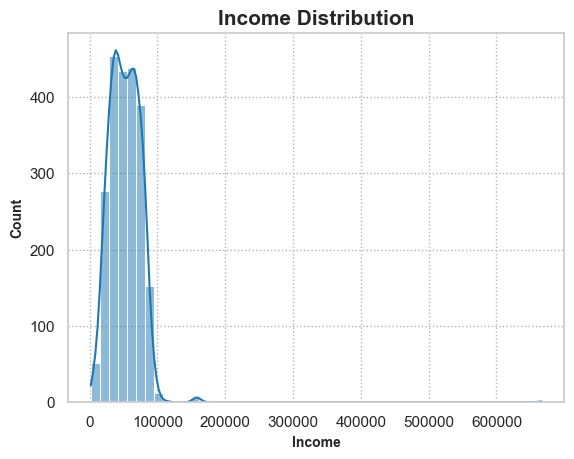

In [12]:
# Plot Income Distribution
sns.histplot(df["Income"], bins = 50, kde = True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.show()

The income distribution is quite right-skewed, where most of the customers has a income between approx. 20k and 80k. Here we also see the outlier stated in the descriptive statistics, of ~666k that has to be dealt with. 

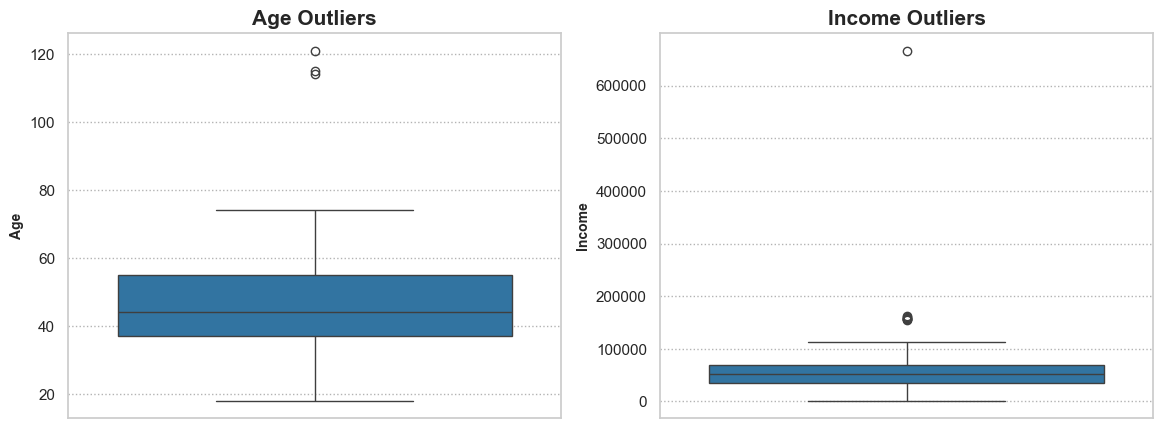

In [13]:
# Boxplot of Age and Income
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Age
sns.boxplot(y = df["Age"], ax = axes[0])
axes[0].set_title("Age Outliers")
# Income
sns.boxplot(y = df["Income"], ax = axes[1])
axes[1].set_title("Income Outliers")

plt.show()


These boxplots confirms what we have already seen:
- `Age` has unrealistic outliers (>100 years old).
- `Income` has some extreme outliers (well above 150k, especially the 666k entry).

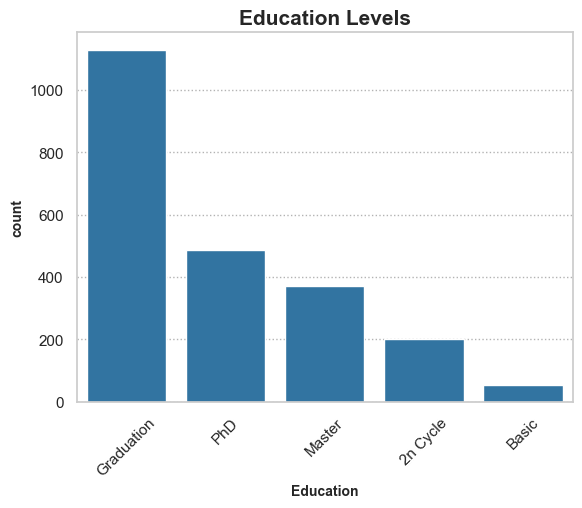

In [14]:
# Education
sns.countplot(data=df, x="Education", order=df["Education"].value_counts().index)
plt.title("Education Levels")
plt.xticks(rotation=45)
plt.show()

Most customers are Graduates, followed by PhD holders. Some categories such as "2n Cycle" and "Basic" represent smaller groups. I'm going to categorize these in a different way later on.


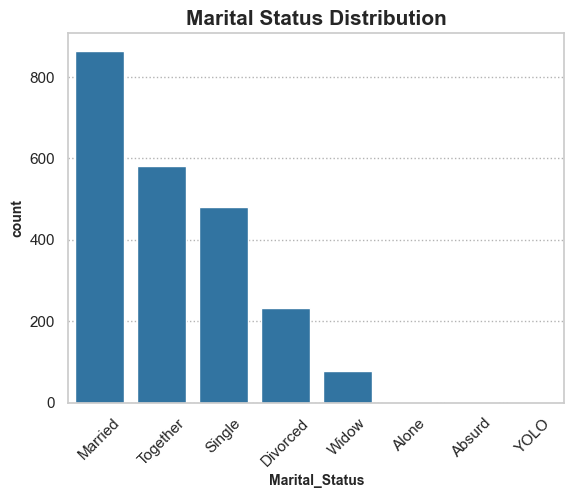

In [15]:
# Marital Status
sns.countplot(data=df, x="Marital_Status", order=df["Marital_Status"].value_counts().index)
plt.title("Marital Status Distribution")
plt.xticks(rotation=45)
plt.show()


The majority of the customers are either Married, Together or Single. However, some of these seems quite weird, like YOLO and absurd. Alone could also be merged with the Single-category. But we'll fix this later on.

### Household
We'll now look at the family composition of the customers. First the `Kidhome` and `Teenhome`, and after what we'll make one feature to look at the total amount of children.

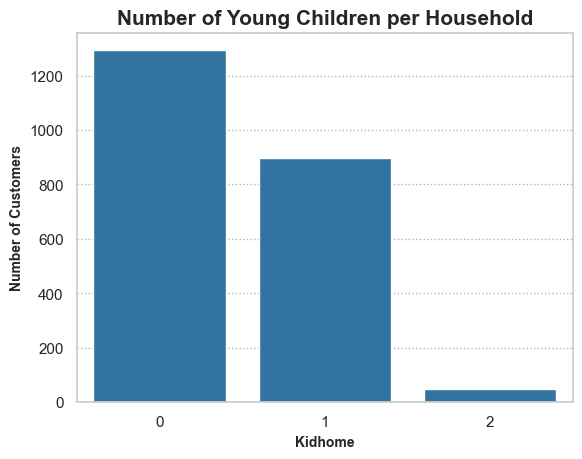

In [16]:
# Kidhome
sns.countplot(x="Kidhome", data=df)
plt.title("Number of Young Children per Household")
plt.xlabel("Kidhome")
plt.ylabel("Number of Customers")
plt.show()

Most of the customers has 0 or 1 kid, while a fewer proportion has 2. 

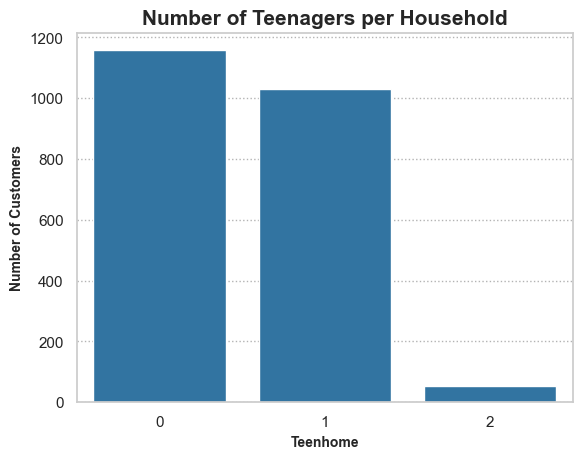

In [17]:
# Teenhome
sns.countplot(x="Teenhome", data=df)
plt.title("Number of Teenagers per Household")
plt.xlabel("Teenhome")
plt.ylabel("Number of Customers")
plt.show()

It's the same for the Teenagers: most of the customers has 0 or 1.

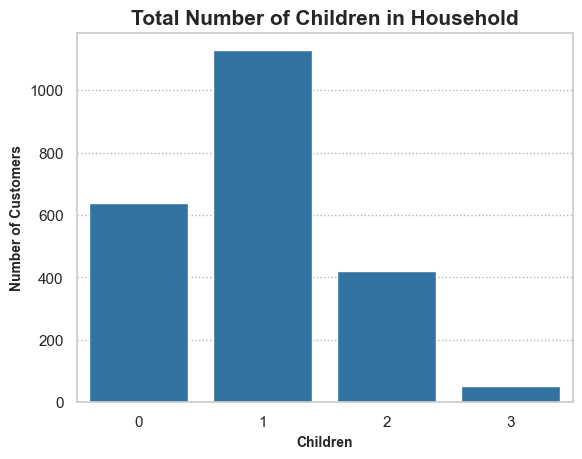

In [18]:
# Create a combined feature for total children
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Plot the distribution
sns.countplot(x="Children", data=df)
plt.title("Total Number of Children in Household")
plt.xlabel("Children")
plt.ylabel("Number of Customers")
plt.show()


Now we see that most of the customers has 1 child. 

### Purchasing Behavior
Let's explore how the customers spend across the product categories. We have a wide selection of products, including wines, meat, fish, fruit, sweets, and gold products. I'll start by making the feature names more readable. 

In [19]:
df =df.rename(columns={"MntWines": "Wines",
                       "MntFruits":"Fruits",
                       "MntMeatProducts":"Meat",
                       "MntFishProducts":"Fish",
                       "MntSweetProducts":"Sweets",
                       "MntGoldProds":"Gold"})

# Place into a list
products = ['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold']

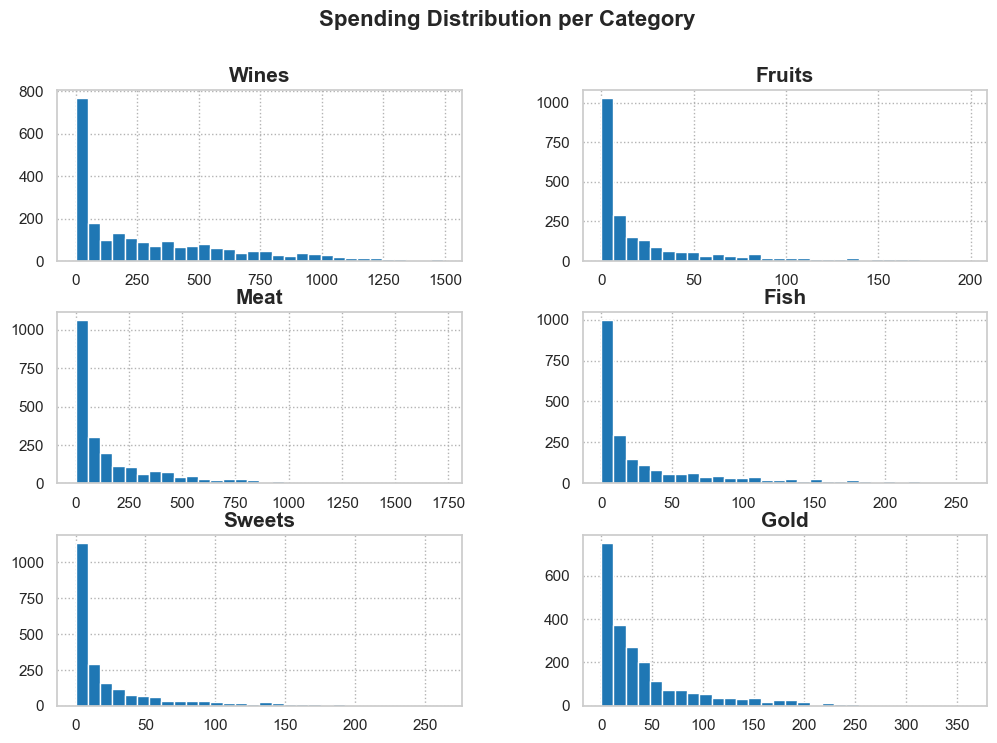

In [20]:
# Histograms of the product spendings
df[products].hist(bins = 30, figsize = (12,8))
plt.suptitle("Spending Distribution per Category", fontweight = "black", size = 16)
plt.show()

Most distributions are highly skewed:  
- Many customers spend little or nothing in certain categories.  
- A few customers spend very large amounts, especially on wine and meat.  

This suggests the presence of outliers that may influence clustering.

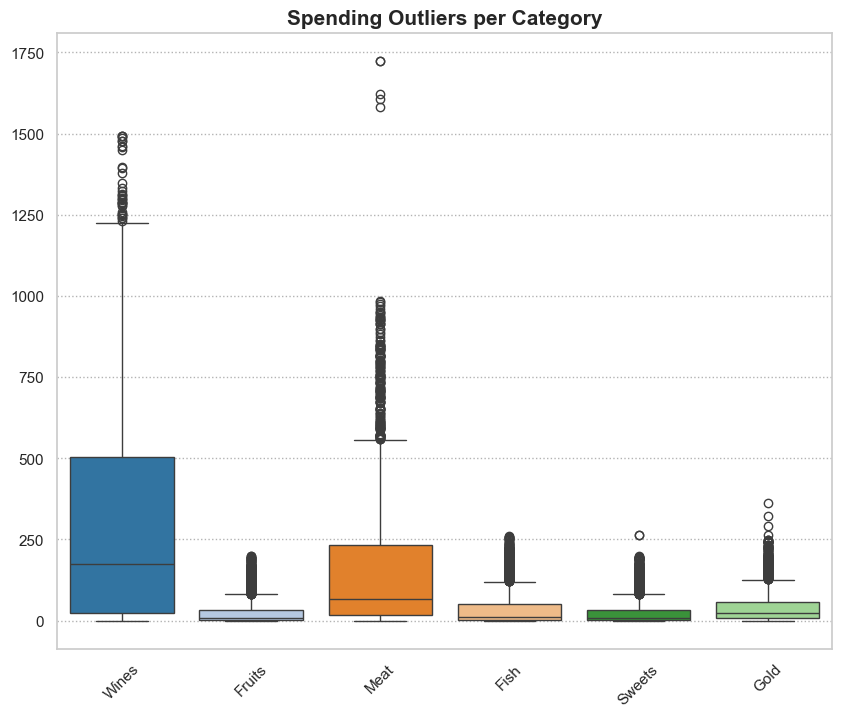

In [21]:
# Boxplots for product spending
plt.figure(figsize=(10,8))
sns.boxplot(data=df[products])
plt.title("Spending Outliers per Category")
plt.xticks(rotation=45)
plt.show()

Boxplots confirm that all product categories contain extreme outliers. Wine and Meat show particularly high maximum values.


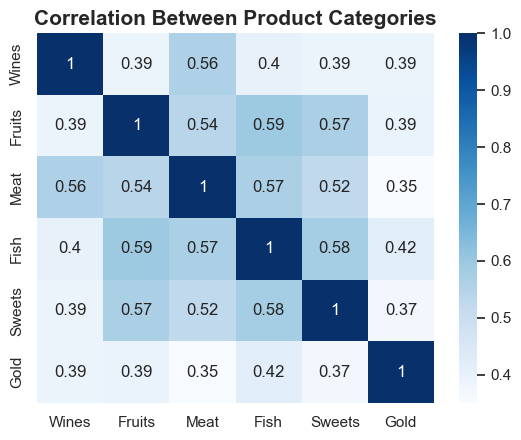

In [22]:
# Correlation heatmap between spending categories
sns.heatmap(df[products].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Product Categories")
plt.show()

We observe some positive correlations between some of the product categories, such as meat and wine, and fruits and fish. This indicates that customers who spend more in one category has a tendency to spend more in the other categories. 

### Customer Engagement
Now we'll explore the customer interactions with the company:
- `Recency`: days since last purchase
- Purchase channels: web, store, catalog
- Campaign responses: acceptance of campaigns, responses, complaints
- Customer Tenure

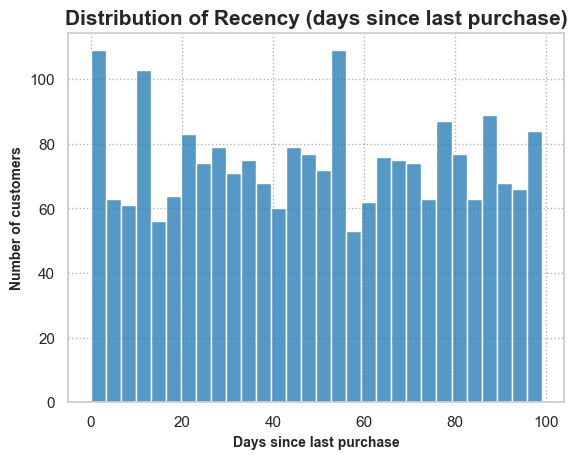

In [23]:
# Recency Distribution
sns.histplot(df["Recency"], bins=30, kde=False)
plt.title("Distribution of Recency (days since last purchase)")
plt.xlabel("Days since last purchase")
plt.ylabel("Number of customers")
plt.show()

There is a wide spread in the data, showing a mix of very active (low recency) and less active (high recency) customers.

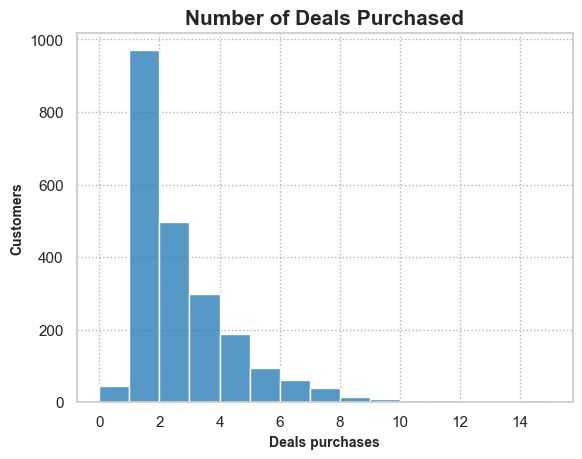

In [24]:
# Purchases with deals
sns.histplot(df["NumDealsPurchases"], bins=15, kde=False)
plt.title("Number of Deals Purchased")
plt.xlabel("Deals purchases")
plt.ylabel("Customers")
plt.show()

Most customers only rarely buy on deals, but a small segment makes frequent deal-based purchases.

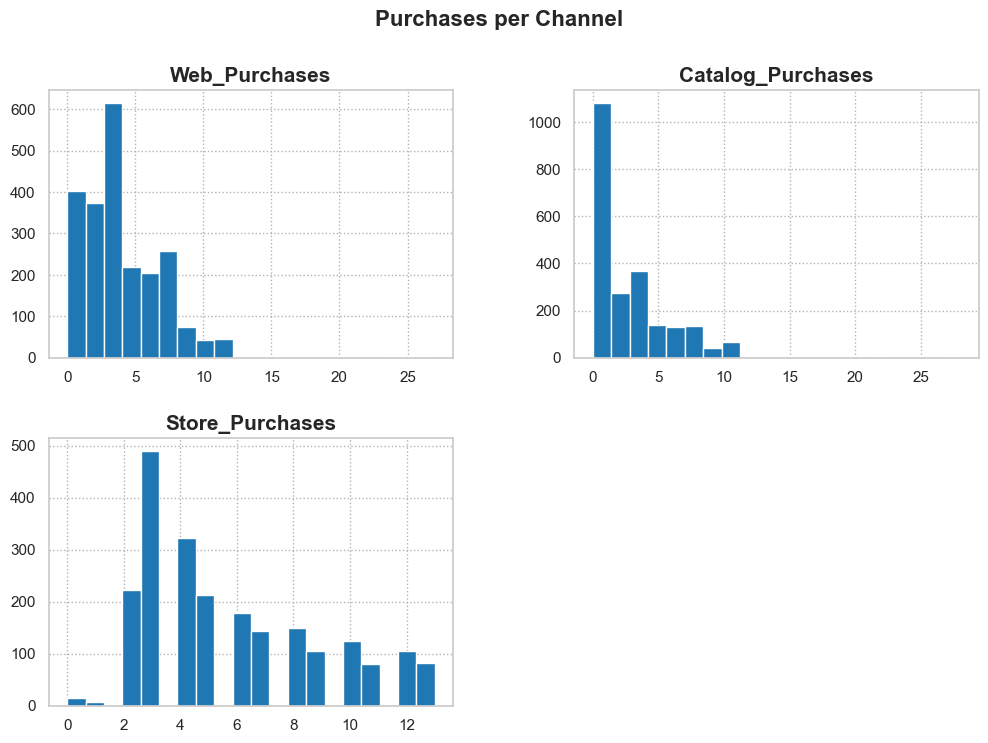

In [25]:
# Purchase channels
# Change the names for better readability
df =df.rename(columns={'NumWebPurchases': "Web_Purchases",
                       'NumCatalogPurchases': "Catalog_Purchases",
                       'NumStorePurchases': "Store_Purchases"
                       })
# Store in a list
channel = ["Web_Purchases", "Catalog_Purchases","Store_Purchases"]

# Plot
df[channel].hist(bins=20, figsize=(12,8))
plt.suptitle("Purchases per Channel", fontweight = "black", size = 16)
plt.show()

Store purchases dominate. Web and catalog purchases are far less frequent, indicating customers are primarily store-oriented.

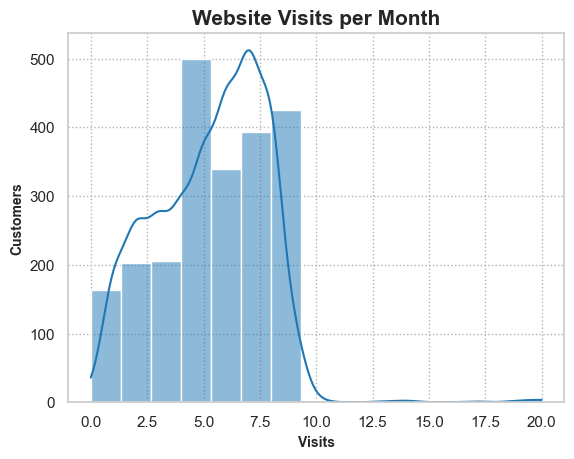

In [26]:
# Website Visits
sns.histplot(df["NumWebVisitsMonth"], bins=15, kde=True)
plt.title("Website Visits per Month")
plt.xlabel("Visits")
plt.ylabel("Customers")
plt.show()

Most customers visit the website only a few times per month, and a small group visits very frequently (10+ times) - these could be seen as outliers.

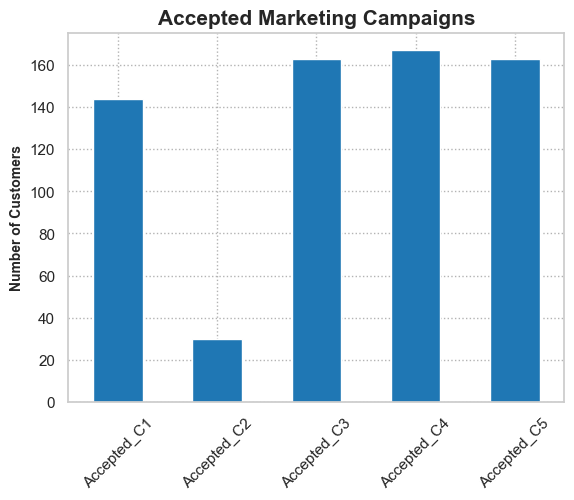

In [27]:
# Campaign Responses
# Tweak a little bit on the names
df =df.rename(columns={"AcceptedCmp1": "Accepted_C1",
                       'AcceptedCmp2': "Accepted_C2",
                       'AcceptedCmp3': "Accepted_C3",
                       'AcceptedCmp4': "Accepted_C4",
                       'AcceptedCmp5': "Accepted_C5"
                       })

# Store in a list
campaigns = ["Accepted_C1","Accepted_C2","Accepted_C3","Accepted_C4","Accepted_C5"]

# Plot
df[campaigns].sum().plot(kind="bar")
plt.title("Accepted Marketing Campaigns")
plt.ylabel("Number of Customers")
plt.xticks(rotation = 45)
plt.show()

Of the total amount of customers, a very few porportion actually accepted the marketing campaigns. All of them shows low response rates, highlighting a limited effectiveness. 

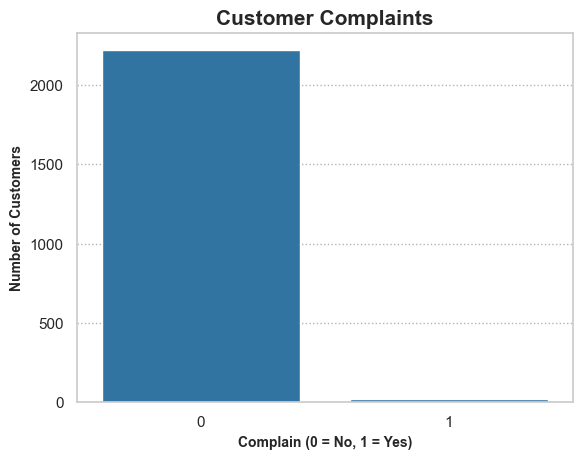

In [28]:
# Complaints
sns.countplot(x="Complain", data=df)
plt.title("Customer Complaints")
plt.xlabel("Complain (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

Only a very small amount of customers have made complaints. Although rare, this may still help identify dissatisfied customers.

In [29]:
# Customer Tenure
# Change the Dt_Customer to a dateframe
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

# Check
df["Dt_Customer"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


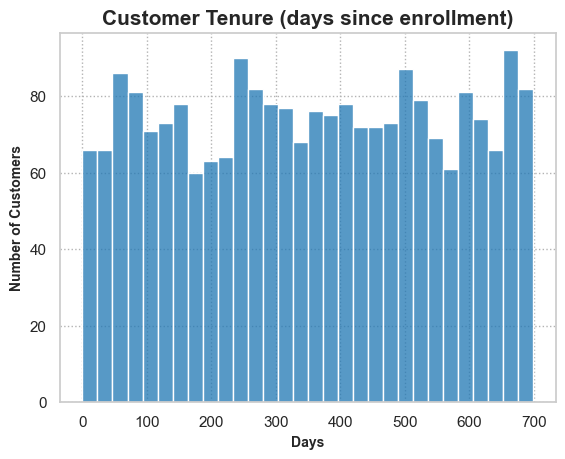

In [30]:
# Calculate tenure
max_date = df["Dt_Customer"].max()
df["Tenure"] = (max_date - df["Dt_Customer"]).dt.days

# Plot
sns.histplot(df["Tenure"], bins=30)
plt.title("Customer Tenure (days since enrollment)")
plt.xlabel("Days")
plt.ylabel("Number of Customers")
plt.show()

Tenure varies widely: some customers have been in the database for several years, while others joined more recently. This can help distinguish loyal long-term customers from new ones. It is also worth noting that the data spans only two years (2012-2014), so the span is max 2 years.


### Insights from EDA
From the exploratory analysis, we can summarize:

**Demographics**
- Most customers are between 30–70 years old, but unrealistic outliers above 100 exist.
- Income is right-skewed, with most customers earning 20k–80k. Extreme outliers (~666k) must be handled.
- Education is dominated by *Graduation* and *PhD*, and the categories should be considered grouped in a different way.
- Marital status is dominated by *Married*, with some noisy categories (YOLO, Absurd, Alone) that will be handled.

**Household**
- Most customers have 0–1 children. Very few have 2 or more.
- When combining Kidhome and Teenhome, the most common household size is 1 child.

**Purchasing Behavior**
- Spending across all categories is highly skewed. Most spend little or nothing, while a few spend very large amounts. However we need to be aware that some customers spend nothing on one category, but can spend alot on another.
- Wines and Meat are the categories with the highest spending and the most extreme outliers.
- There are positive correlations between categories, e.g. Wine ↔ Meat, Fruits ↔ Fish.

**Customer Engagement**
- Recency is evenly spread from 0–99 days, showing both highly active and inactive customers.
- Deal-based purchases are rare overall, but a small segment uses them frequently.
- Purchases are dominated by stores; web and catalog are much less common.
- Website visits are typically low, but a small group are heavy digital users (10+ visits/month).
- Marketing campaign acceptance rates are very low overall, with Campaign 2 particularly unsuccessful.
- Only a handful of customers have ever complained.
- Customer tenure is evenly distributed between 0–700 days, reflecting continuous enrollment between 2012–2014.

---

#### **Key Takeaways for Next Step**
- Clear **outliers** (Age, Income, Spending) need to be removed or adjusted.
- Some **categorical features need cleaning/merging** (Education, Marital_Status).
- New features such as **Age, Children, Tenure, and Total Spending** can improve clustering.
- Features are skewed and on different scales → **scaling will be essential**.


## Data Cleaning and Feature Engineering
Based on the EDA insights and findings, we can now clean the dataset and create new featires to prepare for clustering. 

### Handle the missing values
It was quite clear that the only missing values were in the `Income`feature. The amount was very little, so I'm going to remove these rows as i consider this to not have a big impact further on.

In [32]:
# Drop the rows with missing values in Income and check that the process were successful
df = df[df["Income"].notnull()]

df.isnull().sum().sum()

0

The rows has been removed, and the dataset does not have any missing values. 

### Handle outliers
As we saw in the EDA-process, there were outliers in both `Age`and in the `Income`features. For `Age`, we'll set a limit of only keep values that are higher or equal to 18, and those that are smaller or equal to 100. We'll also set a cap for `Income` at 150 000 since the boxplot revealed that most of the customers lays between an income of 20k to 80k, with the whiskers stopping at approx. 120k. 

In [35]:
# Remove unrealistic ages
df = df[(df["Age"] >= 18) & (df["Age"] <= 100)]
df["Age"].describe()

count    2213.000000
mean       45.082693
std        11.700216
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Age, dtype: float64

In [36]:
# Remove outliers in Income
df = df[df["Income"] <= 150000]
df["Income"].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

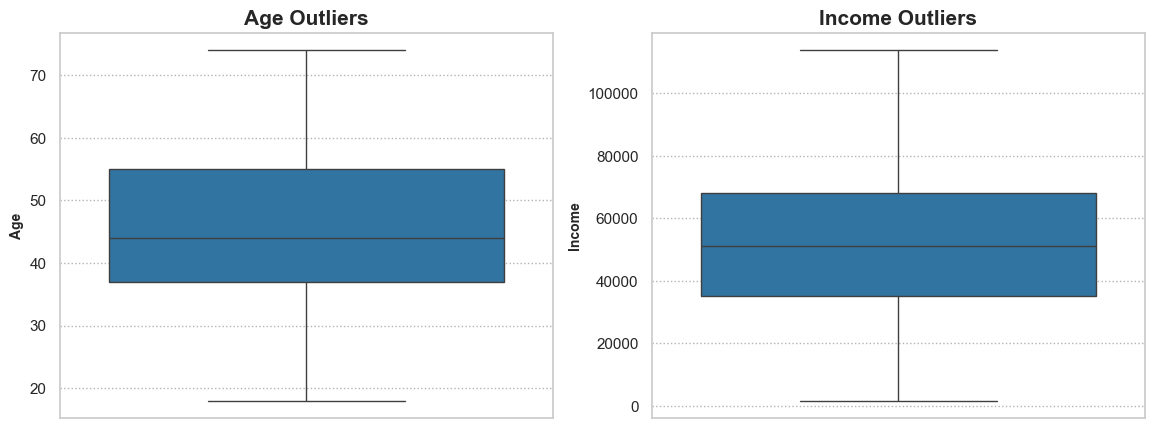

In [45]:
# Plot after removing outliers in Age and Income
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Age
sns.boxplot(y = df["Age"], ax = axes[0])
axes[0].set_title("Age Outliers")
# Income
sns.boxplot(y = df["Income"], ax = axes[1])
axes[1].set_title("Income Outliers")

plt.show()

The outliers has been removed, ensuring that the clusters won't be skewed by unrealistic entries. 

### Simplify some Categories
The `Education`and `Marital_Status`had some categories that I think should be simplified for better interpretability. We'll stick with the categories "Undergraduate", "Graduate" and "Postgraduate" for the different educations for the customers. For the marital statuses, we'll rename the Alone-category to "Single" so that these values are merged with the already existing category, and "Absurd" and "YOLO" will be placed in a "Other"-category. 

In [39]:
# Education grouping
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Graduate",
    "PhD": "Postgraduate"
})

df["Education"].value_counts()

Graduate         1477
Postgraduate      476
Undergraduate     252
Name: Education, dtype: int64

In [40]:
# Marital Status grouping
df["Marital_Status"] = df["Marital_Status"].replace({
    "Alone": "Single",
    "Absurd": "Other",
    "YOLO": "Other"
})
df["Marital_Status"].value_counts()

Married     854
Together    568
Single      473
Divorced    230
Widow        76
Other         4
Name: Marital_Status, dtype: int64

### Feature Engineering
We have already made both the `Age`, `Children`, and the `Tenure`features. So, now we'll make make one feature for the Total spendings of the customers, called `Total_Spending`.

In [43]:
# Create a feature for total spending
df["Total_Spending"] = df[["Wines","Fruits","Meat",
                       "Fish","Sweets","Gold"]].sum(axis=1)

df["Total_Spending"].describe()

count    2205.000000
mean      606.821769
std       601.675284
min         5.000000
25%        69.000000
50%       397.000000
75%      1047.000000
max      2525.000000
Name: Total_Spending, dtype: float64

### Remove Columns
There are a few columns in the dataset that doesn't provide any especially informative value in regards of the clustering process or that we have already used in another way, including `ID`, `Year_Birth`, `Dt_Customer`,`Z_CostContact`,`Z_Revenue`.

In [44]:
df = df.drop(columns=["ID","Year_Birth","Dt_Customer","Z_CostContact","Z_Revenue"])
df.shape

(2205, 28)

We've now reduced the dataset to 2205 rows and 28 features, and it is ready for the preparation step. 

## Preparation before clustering
Before we can proceed with the actual clustering process, we need to go through some steps:
1. Encode the categorical variables `Education`and `Martial_Status`
2. Remove target-like variables, such as `Response`
3. Standardize the numerical variables so that they are on the same scale

In [57]:
# Encode the categorical variables
df_encoded = pd.get_dummies(df, columns = ["Education", "Marital_Status"], drop_first=True)

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Children,Tenure,Total_Spending,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,663,1617,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,2,113,27,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,312,776,0,0,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,139,53,0,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,1,161,422,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,1,381,1341,0,0,1,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,3,19,444,1,0,0,0,0,1,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,155,1241,0,0,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,1,156,843,0,0,0,0,0,1,0


In [59]:
# Exclude the Response (target-like variable)
X = df_encoded.drop(columns=["Response"])

In [58]:
#Initiate Scaler
scaler = StandardScaler()

# Scale features
X_scaled = scaler.fit_transform(X)

In [64]:
X.shape

(2205, 32)

In [63]:
X

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Children,Tenure,Total_Spending,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,663,1617,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,2,113,27,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,312,776,0,0,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,139,53,0,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,1,161,422,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,1,381,1341,0,0,1,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,3,19,444,1,0,0,0,0,1,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,155,1241,0,0,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,1,156,843,0,0,0,0,0,1,0


All variables has now been transformed into numerical values and standardized, and the prepared dataset contains of 2205 rows and 32 features. The data is now ready for clustering. 

## Clustering
We're gonna use the KMeans Clustering technique, which is a unsupervised ML algorithm that helps us group data into clusterss based in their similarities. Unsupervised learning is the technique where we use data that lacks a label with the goal of uncovering hidden patterns or structures in the data.

The process can be explained in three steps:
1. We determine the optimal number of clusters (k) using the elbow method
2. Run the KMeans algorithm with the chosen k
3. Visualize the results using Principal Component Analysis (PCA)


### Find Optimal Number of Clusters

In [68]:
# Create lists to store the results
inertia = []        # Inertia scores, representing distance between centroids of the clusters (should be low)
silhouette_scores = []   # Average silhouette scores for clustering quality - how well data points fits within clusters

K = range(2, 11)        # Amount of clusters to try

# Loop through the range of K's
for k in K:
    kmeans = KMeans(n_clusters = k)     #Initiate the cluster algorithm
    kmeans.fit(X_scaled)                # Fit on scaled data
    inertia.append(kmeans.inertia_)     # How compact the clusters are
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))   # How well-separated the clusters are



Text(0.5, 1.0, 'Elbow Method')

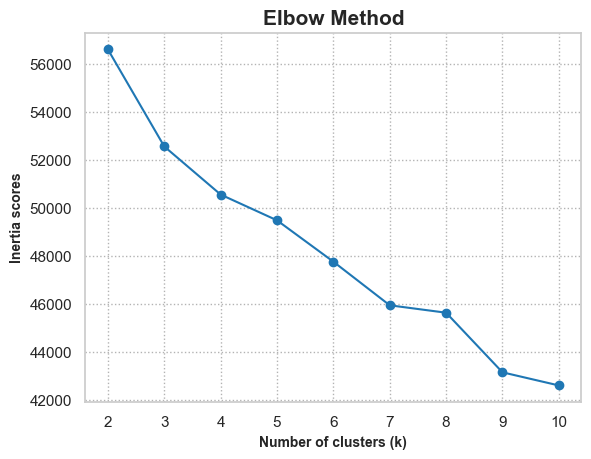

In [73]:
# Plot the elbow plot
plt.plot(K, inertia, marker = 'o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia scores")
plt.title("Elbow Method")

Text(0.5, 1.0, 'Silhouette Score by k')

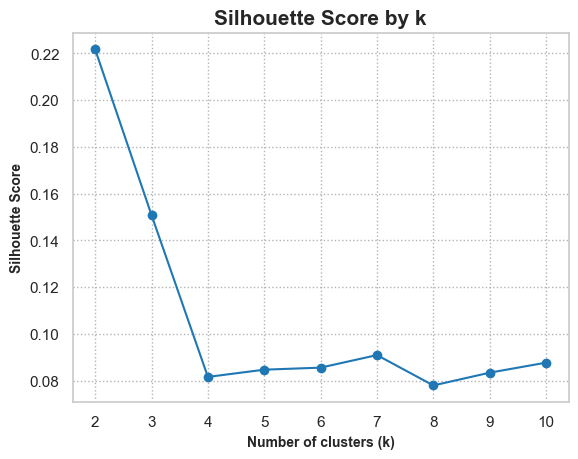

In [75]:
# Plot the silhouette plot
plt.plot(K, silhouette_scores, marker = "o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by k")

Based on the Elbow method and silhouette scores, we select k=3 clusters for further analysis. While k=2 achieves the highest silhouette score, it would result in too coarse segmentation. k=3 provides a better trade-off between compactness, separation, and interpretability.

### Run KMeans


In [76]:
# Run the KMeans algorithm with the chosen k=3
kmeans = KMeans(n_clusters = 3, random_state=42, n_init=10)

# Fit model and assign clusters
clusters = kmeans.fit_predict(X_scaled)

# Store cluster labels in dataframe
df_encoded["Cluster"] = clusters

Each customer has now been assigned to one of **3 clusters**. These clusters will be used for profiling to understand customer segments.


### Visualize with PCA
Principal Component Analysis (PCA) is a dimensionality reduction-method which helps us reduce the number of features while still keeping the most important information. 

In [77]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

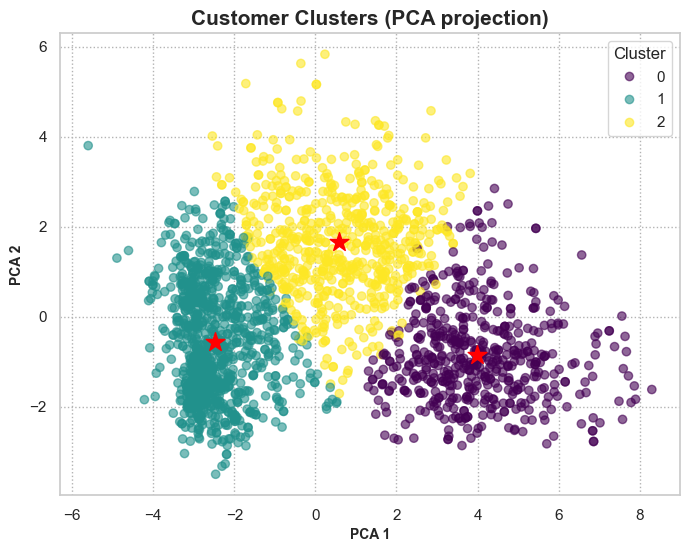

In [84]:
# Plot clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.6)

# Add centroids (transformed into PCA space)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, marker="*", label="Centroids")

# Labels and legend
plt.title("Customer Clusters (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

The PCA projection shows the three clusters in 2D space:
- Each color corresponds to a cluster (0, 1, 2).  
- Red star-markers indicate the cluster centroids.  
- Some overlap is expected because PCA compresses many dimensions into two, but we can clearly observe distinct groupings.

### Clustering Profiling
To understand the clusters, we can profile them across demographics, spending, and engagement variables. 
This helps us translate abstract cluster IDs into meaningful customer segments.

#### Summary Statistics per Cluster

In [86]:
# Select key variables for profiling
profile_vars = [
    "Age","Income","Children","Total_Spending","Recency","Tenure",
    'NumDealsPurchases', 'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases'
]

cluster_profile = df_encoded.groupby("Cluster")[profile_vars].mean().round(1)
cluster_profile

,Age,Income,Children,Total_Spending,Recency,Tenure,NumDealsPurchases,Web_Purchases,Catalog_Purchases,Store_Purchases
Cluster,,,,,,,,,,
0,45.3,76186.1,0.2,1403.1,49.5,351.9,1.2,5.1,6.0,8.4
1,42.3,34567.0,1.2,100.0,49.2,321.9,2.1,2.1,0.6,3.2
2,49.5,58369.3,1.1,749.7,48.2,407.6,3.7,6.5,3.2,7.8


The clusters can be summarized as follows:

- **Cluster 0 – Affluent Heavy Spenders**  
  Mid-40s, highest income, few children, very high spending across all product categories.
  Strong presence both online and in-store.  

- **Cluster 1 – Budget-Conscious Families**  
  Early 40s, lowest income, more children, very low overall spending.
  Lower engagement across all channels.  

- **Cluster 2 – Established Middle Spenders**  
  Around 50 years old, medium income, moderate spending.
  Balanced use of web and store channels, representing a stable customer base.  

#### Visualize Differences Across Clusters

To better understand the clusters, we visualize the average values for a few key variables:  

- **Age** – gives an idea of the typical life stage of each cluster.  
- **Income** – shows the economic differences between clusters.  
- **Total Spending** – highlights which groups spend the most.  
- **Children** – shows differences in household composition.  
- **Recency** – measures how recently customers have made a purchase.  

These barplots make it easier to compare clusters at a glance.

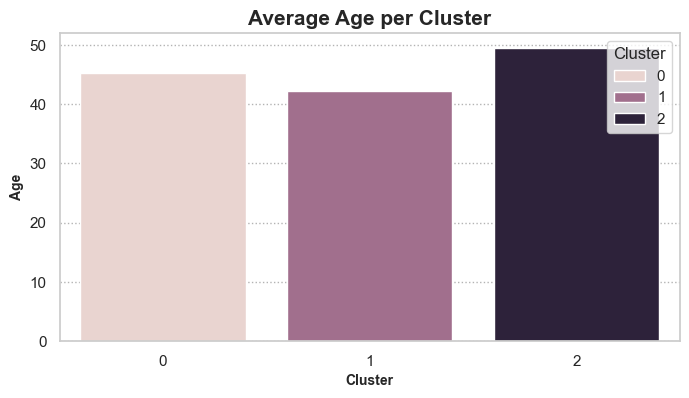

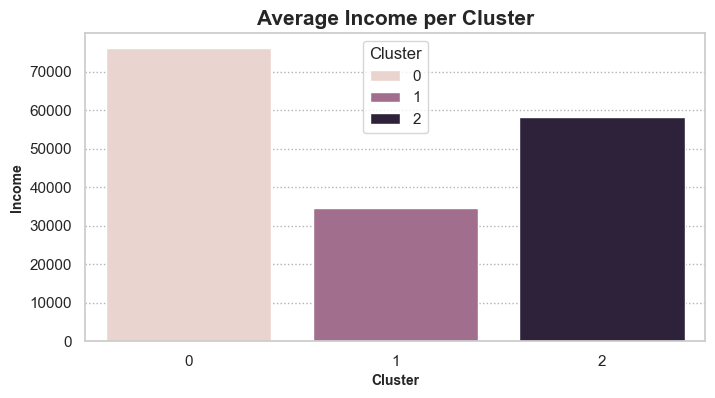

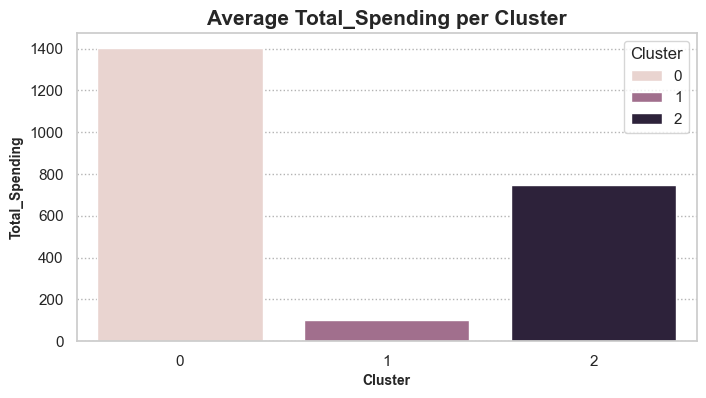

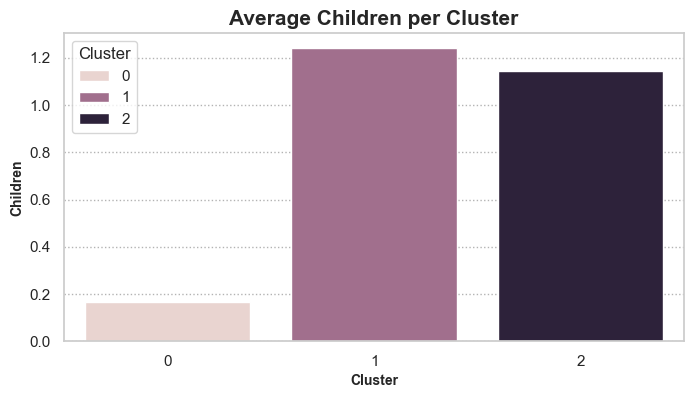

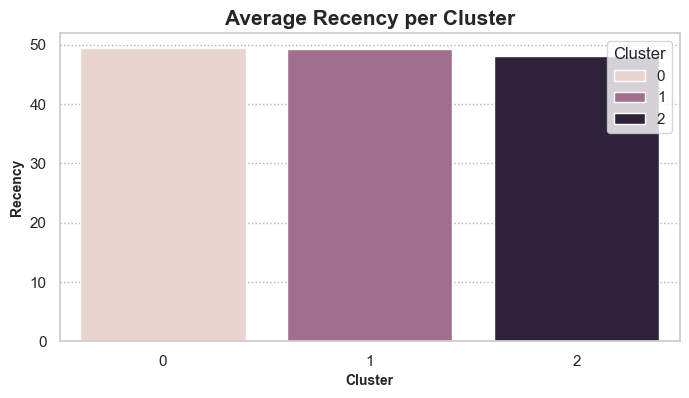

In [94]:
# Barplot for selected features
features_to_plot = ["Age","Income","Total_Spending","Children","Recency"]

for feat in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.barplot(x="Cluster", y=feat, data=df_encoded, estimator="mean", ci=None, hue = "Cluster")
    plt.title(f"Average {feat} per Cluster")
    plt.ylabel(feat)
    plt.show()

- **Cluster 0**: Highest income and very high spending, but almost no children.  
- **Cluster 1**: Youngest group, lowest income, more children, and extremely low spending.  
- **Cluster 2**: Oldest group, medium income, some children, and moderate spending.  
- **Recency** is roughly the same across clusters, meaning they are equally “recent” in their purchasing activity.  

This gives us an initial idea of what each cluster might represent:  
- Cluster 0 → *Affluent Heavy Spenders*  
- Cluster 1 → *Budget-Conscious Families*  
- Cluster 2 → *Established Middle Spenders*  

#### Campaign Response per Cluster
To evaluate how responsive each cluster is to marketing, we look at the acceptance rates for five past campaigns (Cmp1–Cmp5) and the overall Response variable.  

This helps us understand whether certain customer segments are more likely to engage with marketing efforts.

In [97]:
# Select campaign-related columns
campaign_cols = ["Accepted_C1","Accepted_C2","Accepted_C3","Accepted_C4","Accepted_C5","Response"]

# Calculate mean acceptance per cluster
cluster_campaigns = df_encoded.groupby("Cluster")[campaign_cols].mean().round(3)
cluster_campaigns

,Accepted_C1,Accepted_C2,Accepted_C3,Accepted_C4,Accepted_C5,Response
Cluster,,,,,,
0,0.226,0.035,0.084,0.134,0.277,0.299
1,0.001,0.002,0.075,0.011,0.000,0.094
2,0.029,0.014,0.064,0.128,0.016,0.116


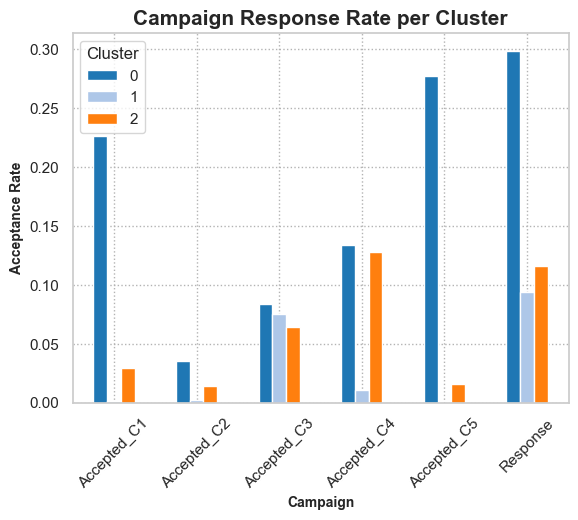

In [100]:
cluster_campaigns.T.plot(kind="bar")
plt.title("Campaign Response Rate per Cluster")
plt.ylabel("Acceptance Rate")
plt.xlabel("Campaign")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.show()

- **Cluster 0**: The most responsive group. High acceptance rates, especially for Campaign 1 (22.6%) and Campaign 5 (27.7%).  
- **Cluster 1**: Almost no campaign acceptance. Only ~9% responded to any campaign.  
- **Cluster 2**: Moderate responsiveness, with the highest acceptance in Campaign 4 (12.8%).  

This indicates that Cluster 0 should be the primary target for marketing campaigns, while Cluster 1 is unlikely to respond regardless of effort.

#### CLuster Descriptions
To finalize the profiling, we combine demographics, spending, channel behavior, and campaign response into one summary and provide business-oriented descriptions of each cluster.


In [103]:
# Select key variables for summary
summary = [
    "Age","Income","Children","Total_Spending","Recency",
    'Web_Purchases','Catalog_Purchases', 'Store_Purchases',
    "Accepted_C1","Accepted_C2","Accepted_C3","Accepted_C4","Accepted_C5","Response"
]

cluster_summary = df_encoded.groupby("Cluster")[summary].mean().round(1)
cluster_summary

,Age,Income,Children,Total_Spending,Recency,Web_Purchases,Catalog_Purchases,Store_Purchases,Accepted_C1,Accepted_C2,Accepted_C3,Accepted_C4,Accepted_C5,Response
Cluster,,,,,,,,,,,,,,
0,45.3,76186.1,0.2,1403.1,49.5,5.1,6.0,8.4,0.2,0.0,0.1,0.1,0.3,0.3
1,42.3,34567.0,1.2,100.0,49.2,2.1,0.6,3.2,0.0,0.0,0.1,0.0,0.0,0.1
2,49.5,58369.3,1.1,749.7,48.2,6.5,3.2,7.8,0.0,0.0,0.1,0.1,0.0,0.1


Based on the cluster profile table, the three clusters can be described as follows:

**Cluster 0 – Affluent Heavy Spenders**  
- Mid-40s, highest income (~76k), almost no children.  
- Extremely high total spending (~1400).  
- Very active across store, web, and catalog channels.  
- Highest campaign responsiveness (~30%).  
-> *Premium customers – high-value, loyal, and highly responsive to marketing.*

**Cluster 1 – Budget-Conscious Families**  
- Early 40s, lowest income (~35k), most children.  
- Very low total spending (~100).  
- Limited engagement across all channels.  
- Almost no campaign responsiveness (~9%).  
-> *Low-value segment – young families with limited budgets, not responsive to marketing.*

**Cluster 2 – Established Middle Spenders**  
- Around 50 years old, medium income (~58k), some children.  
- Moderate total spending (~750).  
- Active across store and online, some catalog use.  
- Moderate campaign responsiveness (~11–12%).  
-> *Stable, mid-value segment – established customers with steady spending and limited campaign engagement.*

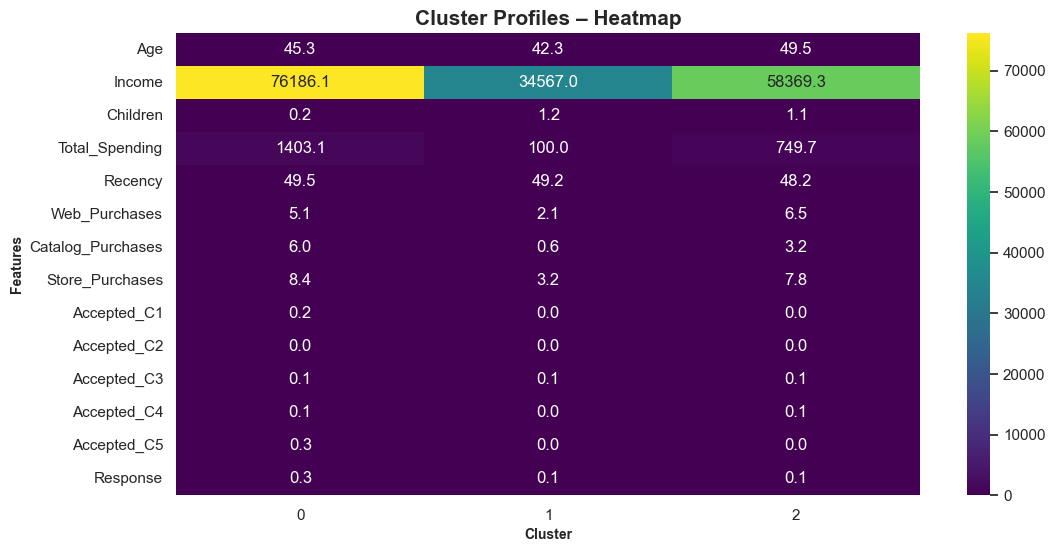

In [104]:
plt.figure(figsize=(12,6))
sns.heatmap(cluster_summary.T, annot=True, cmap="viridis", fmt=".1f")
plt.title("Cluster Profiles – Heatmap")
plt.ylabel("Features")
plt.xlabel("Cluster")
plt.show()

The heatmap gives a clear overview of how the clusters differ:

- **Cluster 0** stands out with the highest income and spending, and also the strongest campaign response.  
- **Cluster 1** has the lowest income and spending, more children, and almost no campaign responsiveness.  
- **Cluster 2** represents a middle group with moderate income, spending, and some campaign engagement.  

Together with the profile table, the heatmap confirms the distinctiveness of each cluster.  


## Conclusion
In this project, we analyzed a retail customer dataset to explore customer behavior, demographics, and engagement patterns. Through exploratory data analysis (EDA), we identified important characteristics such as skewed spending distributions, outliers in age and income, and differences across product categories and purchase channels.

We then applied K-Means clustering to segment the customer base. Using the elbow method and silhouette scores, we selected **3 clusters** as the optimal solution.

Cluster profiling revealed three distinct customer groups:
- **Cluster 0 – Affluent Heavy Spenders**: High-income customers with very high spending and strong responsiveness to marketing campaigns.  
- **Cluster 1 – Budget-Conscious Families**: Younger families with lower income, more children, very low spending, and minimal campaign response.  
- **Cluster 2 – Established Middle Spenders**: Older customers with medium income and moderate spending, representing a stable mid-value segment.  

These insights can support **targeted marketing strategies**: focus premium offers on Cluster 0, maintain Cluster 1 at low cost, and engage Cluster 2 with selective campaigns.  

Overall, the project demonstrates how clustering can be used to **translate raw customer data into actionable business insights**, balancing technical methods with clear business interpretation.

# README
# Customer Segmentation with Clustering

This project applies clustering techniques to a retail dataset in order to identify distinct customer segments.  
The goal is to demonstrate how data science can be used to support targeted marketing strategies and improve customer understanding.

---

## 📊 Project Overview
- **Dataset**: Retail customer dataset with demographic, spending, and campaign response variables.  
- **Techniques**:  
  - Exploratory Data Analysis (EDA) for understanding demographics, purchasing behavior, and customer engagement.  
  - Data cleaning and feature engineering (handling outliers, creating aggregated features).  
  - **K-Means clustering** for segmentation.  
  - Cluster profiling with descriptive statistics and visualization.  

---

## 🔑 Key Insights
- Customers can be grouped into **three distinct clusters**:  
  1. **Affluent Heavy Spenders** – High income, very high spending, highly responsive to campaigns.  
  2. **Budget-Conscious Families** – Low income, more children, very low spending, little to no response to campaigns.  
  3. **Established Middle Spenders** – Medium income, moderate spending, stable customer base with some campaign responsiveness.  

- These insights can guide **marketing strategy**:  
  - Premium offers for high-value customers (Cluster 0).  
  - Low-cost maintenance for low-value families (Cluster 1).  
  - Selective campaigns for stable mid-value customers (Cluster 2).  

---

## 📂 Repository Structure
- `Retail_Customer_Segmentation.ipynb` → Jupyter Notebook with full analysis and clustering.  
- `customer_segmentation.csv` → Dataset used in the project.  
- `README.md` → Project overview (this file).  

---

## ⚙️ Tools & Libraries
- Python (pandas, numpy, matplotlib, seaborn, scikit-learn)  
- Jupyter Notebook for analysis and visualization  

---

## 🚀 Next Steps / Future Work
- Experiment with alternative clustering methods (e.g., Hierarchical, DBSCAN).  
- Explore dimensionality reduction techniques beyond PCA.  
- Build predictive models to estimate cluster membership for new customers.  

---

## 👤 Author
Created by [Your Name] – demonstrating applied data science for portfolio purposes.
